# Linear Transformations


## What Is a Linear Transformation?

A linear transformation is a rule that takes a vector, moves or stretches it, and gives you a new vector — all while preserving linearity.

That means two key properties must hold:

1️⃣ Additivity:

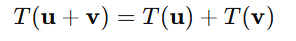

2️⃣ Homogeneity (Scaling):

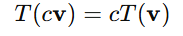

These ensure that lines remain lines, and the origin stays fixed.
If you visualize a grid, a linear transformation can rotate, stretch, or shear it — but never curve it.

### 💡 In ML:
Linear transformations are the building blocks of neural networks.
Each layer applies a matrix that transforms inputs into new feature spaces.



---

## Matrices as Linear Transformations
Every matrix represents a linear transformation.

Example:

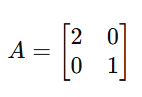

This stretches vectors along the x-axis by 2, while keeping the y-direction unchanged.

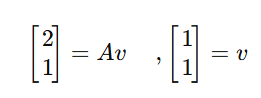



In [1]:
# 🧪 Code Example
import numpy as np

A = np.array([[2, 0],
              [0, 1]])
v = np.array([1, 1])

Av = np.dot(A, v)
print("A =", A)
print("v =", v)
print("A × v =", Av)

A = [[2 0]
 [0 1]]
v = [1 1]
A × v = [2 1]


💡 Interpretation:

The vector doubled in the x-direction — a horizontal stretch.



---
## Linear Transformations as Matrices

If a transformation is linear, we can express it as a matrix.

Example:

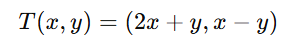

Then:

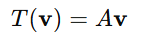

where

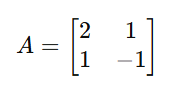



In [2]:
# 🧪 Code Example
A = np.array([[2, 1],
              [1, -1]])
v = np.array([3, 2])

Av = np.dot(A, v)
print("A × v =", Av)

A × v = [8 1]


💡 In ML:

Each weight matrix in a neural network defines such a transformation, mapping input features into new dimensions.



---
### Matrix Multiplication = Combining Transformations

Matrix multiplication represents composition of transformations.

If:


A rotates space


B stretches space

Then:


(BA)v=B(Av)

applies A first, then B.


In [3]:
# 🧪 Code Example
A = np.array([[0, -1],
              [1,  0]])   # 90° rotation
B = np.array([[2, 0],
              [0, 1]])    # Stretch x by 2
v = np.array([1, 1])

BA = np.dot(B, A)
result = np.dot(BA, v)

print("B × A =\n", BA)
print("(BA) × v =", result)

B × A =
 [[ 0 -2]
 [ 1  0]]
(BA) × v = [-2  1]


💡 In ML:
Each layer applies a matrix transformation:

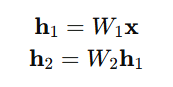

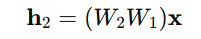

Your whole network is just a composition of linear transformations, followed by non-linear activations.



---
### The Identity Matrix

The identity matrix acts like a mirror that changes nothing.

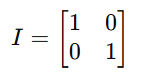

It’s the “do-nothing” transformation:

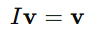



In [4]:
 # 🧪 Code Example
I = np.eye(2)
v = np.array([4, 5])

Iv = np.dot(I, v)
print("I × v =", Iv)

I × v = [4. 5.]


💡 In ML:
Used in ResNets (Residual Networks) — skip connections that pass part of the signal unchanged.



---

### The Matrix Inverse

A matrix inverse “undoes” what the matrix does.

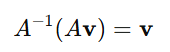

Example:

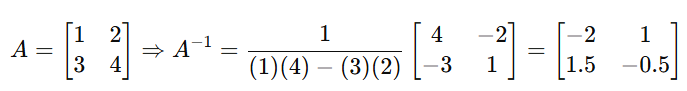

In [5]:
# 🧪 Code Example
A = np.array([[1, 2],
              [3, 4]])

A_inv = np.linalg.inv(A)
print("A⁻¹ =\n", A_inv)

v = np.array([1, 2])
Av = np.dot(A, v)
recovered = np.dot(A_inv, Av)
print("Recovered v =", recovered)

A⁻¹ =
 [[-2.   1. ]
 [ 1.5 -0.5]]
Recovered v = [1. 2.]


💡 In ML:

In Linear Regression (Normal Equation), we use the inverse to compute:

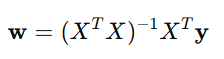

to “undo” correlations between features.

## 🚫 When Does an Inverse Not Exist?

A matrix is invertible only if it’s:

- Square (same number of rows and columns)

- Full rank (no redundant or dependent rows)

If its determinant = 0, the matrix is singular — meaning information was lost.

💡 Example:

If a transformation projects 3D points to a 2D plane, one dimension is lost → it can’t be reversed.

In [6]:
# 🧪 Code Example
A = np.array([[2, 4],
              [1, 2]])  # Notice: second row is a multiple of the first

det = np.linalg.det(A)
print("Determinant =", det)

Determinant = 0.0


💡 Interpretation:

Matrix is singular → no inverse exists because the transformation collapses dimensions.



---
## Neural Networks and Matrices

Each neural network layer performs a linear transformation:

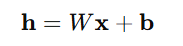


- W → weight matrix (linear transformation)

- b → bias vector (translation)

- Activation → nonlinear twist

Without nonlinearities, a deep network is just one big linear transformation.
That’s why activations like ReLU or sigmoid are crucial — they introduce nonlinearity to model complex patterns.




---

### ⚗️ exercise

Given the transformation:

T(x,y) = (3x+2y,x+4y)

1️⃣ Write the matrix A

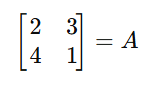

2️⃣ Check if it’s invertible (determinant ≠ 0)


In [7]:
A = np.array([[3, 2],
              [1, 4]])

det = np.linalg.det(A)
print("Determinant =", det)

Determinant = 10.000000000000002


Since the determinant ≠ 0 → A is invertible.

3️⃣ Compute $A^{-1}$



In [8]:
A_inv = np.linalg.inv(A)
print("A⁻¹ =\n", A_inv)

A⁻¹ =
 [[ 0.4 -0.2]
 [-0.1  0.3]]


4️⃣ Test by applying A and $A^{-1}$


In [9]:
v = np.array([1, 2])
Av = np.dot(A, v)
recovered = np.dot(A_inv, Av)

print("A × v =", Av)
print("Recovered v =", recovered)

A × v = [7 9]
Recovered v = [1. 2.]


Applying $A^{-1}$  perfectly recovers the original vector.